In [9]:
# Cell 1: Imports
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
import os

# Set plot style
plt.style.use('ggplot')
print("Libraries imported.")

Libraries imported.


In [10]:
# Cell 2: Define Paths
# We go one level up ('..') from the 'notebooks' folder
DATA_DIR = "../data/processed"
TRAIN_FILE = os.path.join(DATA_DIR, "training.pt")
TEST_FILE = os.path.join(DATA_DIR, "test.pt")

print(f"Train file path: {TRAIN_FILE}")
print(f"Test file path: {TEST_FILE}")

Train file path: ../data/processed\training.pt
Test file path: ../data/processed\test.pt


In [11]:
# Cell 3: Load Processed Data
try:
    train_images, train_labels = torch.load(TRAIN_FILE)
    test_images, test_labels = torch.load(TEST_FILE)
    
    print(f"Training data shapes: {train_images.shape}, {train_labels.shape}")
    print(f"Test data shapes: {test_images.shape}, {test_labels.shape}")

except FileNotFoundError:
    print("---!!! ERROR: Processed data not found! !!!---")
    print(f"File not found at: {TRAIN_FILE}")
    print("Please go to your terminal and run your 'datautils.py' script first.")

Training data shapes: torch.Size([60000, 1, 28, 28]), torch.Size([60000])
Test data shapes: torch.Size([10000, 1, 28, 28]), torch.Size([10000])


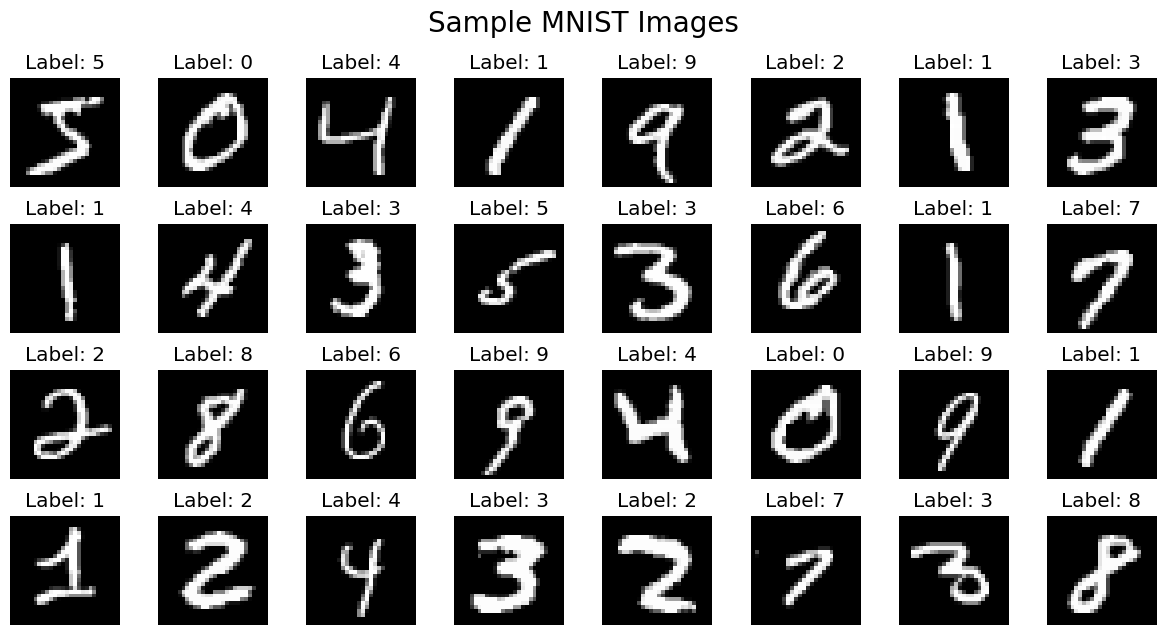

In [12]:
# Cell 4: Visualize a Grid of Sample Images
def plot_sample_grid(images, labels, n_rows=4, n_cols=8):
    plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
    for i in range(n_rows * n_cols):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        # Squeeze to remove channel dim (1, 28, 28) -> (28, 28)
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title(f"Label: {labels[i].item()}")
        plt.axis("off")
    plt.tight_layout()
    plt.suptitle("Sample MNIST Images", fontsize=20, y=1.05)
    plt.show()

# Plot the first 32 images
plot_sample_grid(train_images, train_labels)

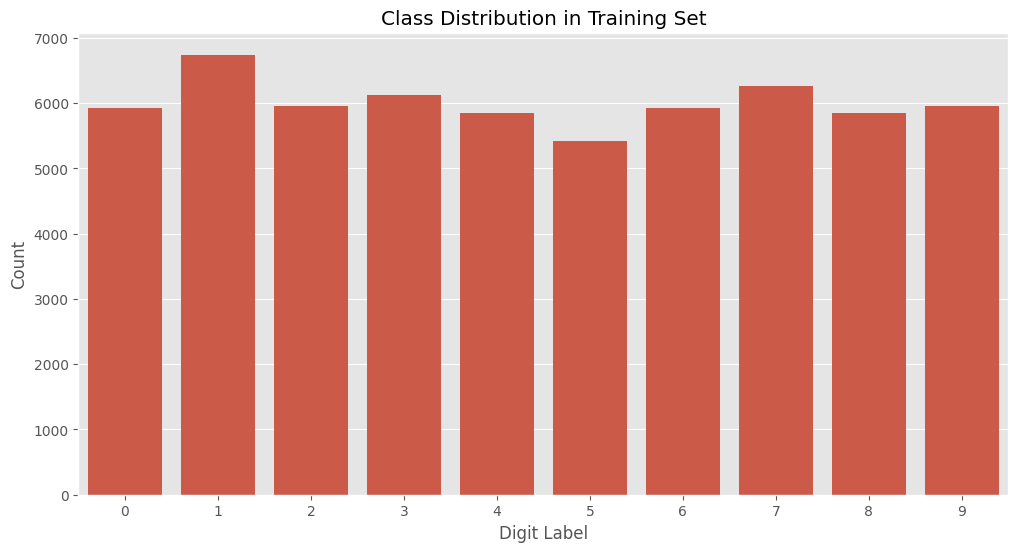

In [13]:
# Cell 5: Plot Class Distribution
plt.figure(figsize=(12, 6))
# Get unique counts for each label
labels, counts = np.unique(train_labels.numpy(), return_counts=True)

sns.barplot(x=labels, y=counts)
plt.title("Class Distribution in Training Set")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()